# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.

Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All

If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the variable "observations" and change it to 100000, instead of 1000.

Here are some takeaways:
1. It takes the algorithm more time to solve the problem.
2. No further adjustments are needed, as the placeholders' "None" argument deals with the problem.
3. The result is the same as we the loss was scaled (the mean_squared_loss, so the average L2-norm).
4. matplotlib cannot plot the data, as there are too many points.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ten

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [3]:

observations = 100000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [4]:

input_size = 2
output_size = 1

### Outlining the model

In [12]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [13]:

mean_loss = tf.compat.v1.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

### Prepare for execution

In [14]:

sess = tf.compat.v1.InteractiveSession()

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Initializing variables

In [15]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [16]:

training_data = np.load('TF_intro.npz')

### Learning

In [17]:

for i in range(100): 
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

216.65938
90.144905
41.000584
21.504906
13.441715
9.83262
7.992223
6.8806853
6.091405
5.4626145
4.9278145
4.457916
4.0387526
3.662288
3.3231401
3.017196
2.7410367
2.4916952
2.2665403
2.0632129
1.879594
1.71377
1.5640169
1.4287766
1.3066406
1.196342
1.0967311
1.0067736
0.9255335
0.8521659
0.78590834
0.72607154
0.6720331
0.6232317
0.57915926
0.5393581
0.5034133
0.47095257
0.44163692
0.41516265
0.39125353
0.36966178
0.35016215
0.33255202
0.3166485
0.3022861
0.28931573
0.27760226
0.26702362
0.25747046
0.24884298
0.24105144
0.2340149
0.22766039
0.22192173
0.21673903
0.21205863
0.20783167
0.20401448
0.2005671
0.19745377
0.19464225
0.19210324
0.1898102
0.18773931
0.18586926
0.18418027
0.182655
0.1812776
0.18003362
0.17891023
0.1778957
0.17697948
0.17615204
0.17540482
0.17472994
0.1741205
0.1735701
0.1730731
0.1726242
0.17221887
0.17185272
0.17152213
0.17122352
0.1709539
0.17071037
0.17049044
0.17029187
0.1701125
0.1699505
0.1698042
0.16967206
0.16955286
0.16944513
0.16934781
0.16925992
0.1691

### Plotting the data

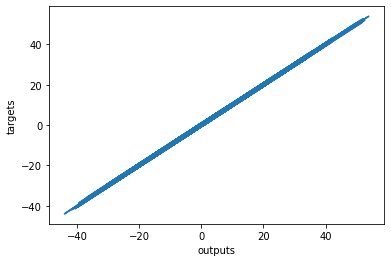

In [18]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()